In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 불러오기


In [2]:
br = pd.read_csv("breast.csv")
br

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
br.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### 결측치 확인

In [4]:
br.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
len(br.id.unique())

569

In [6]:
br.diagnosis.unique()

array(['M', 'B'], dtype=object)

### diagnosis M = 1, B = 0 종속변수 숫자 형식으로 바꿔주기

In [7]:
br["dia"] = br["diagnosis"].map({'M':1,'B':0})
br

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,dia
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1


### 불필요한 열 제거

In [8]:
br = br.drop(columns = ["Unnamed: 32", "diagnosis", "id"])
br

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,dia
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [9]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

# 상관분석

<AxesSubplot:>

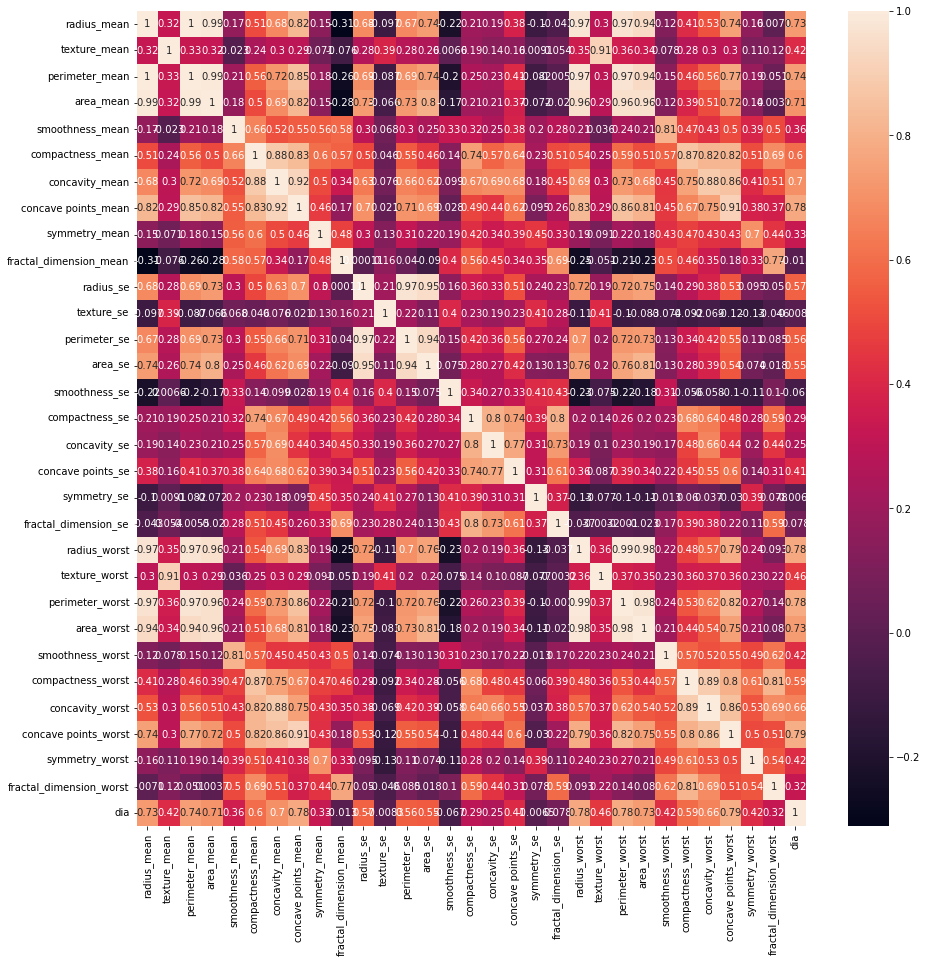

In [10]:
br_corr = br.corr()
plt.figure(figsize=(15,15))
sns.heatmap(br_corr, annot=True)

### Mean, Se, Worst으로 그룹핑, 그룹별로 상관관계가 있는 것으로 보고 이 후 단계 진행

# 다중공선성

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = br.columns
vif['VIF factor'] = [variance_inflation_factor(br.values, i) for i in range(br.shape[1])]
vif.round(1)

,features,VIF factor
0,radius_mean,63787.2
1,texture_mean,251.1
2,perimeter_mean,58217.3
3,area_mean,1305.5
4,smoothness_mean,393.4
5,compactness_mean,201.5
6,concavity_mean,158.1
7,concave points_mean,154.9
8,symmetry_mean,184.5
9,fractal_dimension_mean,654.9


# 독립변수로 _mean 그룹 데이터만 사용

In [12]:
X_br_mean = br[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean",'symmetry_mean',"fractal_dimension_mean"]]
X_br_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [13]:
Y_br = br[["dia"]]
Y_br.shape

(569, 1)

### 정규화

In [14]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
X_mm_mean = MM.fit_transform(X_br_mean)
# Y_mm = MM.fit_transform(Y_br)

In [15]:
# 데이터셋 나누기

In [16]:
from sklearn.model_selection import train_test_split

mm_X_train, mm_X_test, mm_Y_train, mm_Y_test = train_test_split(X_mm_mean, Y_br, test_size = 0.2, random_state = 1)

In [17]:
print(mm_X_train.shape, mm_Y_test.shape)

(455, 10) (114, 1)


In [18]:
mm_X_train, mm_X_val, mm_Y_train, mm_Y_val = train_test_split(mm_X_train, mm_Y_train, test_size = 0.25, random_state = 1)

In [19]:
print(mm_X_train.shape, mm_Y_val.shape)

(341, 10) (114, 1)


In [20]:
# 모델 학습 예측

In [21]:
from sklearn.linear_model import LogisticRegression

# train 데이터로 모델 학습
lg = LogisticRegression()
lg.fit(mm_X_train,mm_Y_train)

LogisticRegression()

In [22]:
# val 데이터로 모델 검증
lg_pre = lg.predict(mm_X_val)
lg.score(mm_X_val, mm_Y_val)

0.9649122807017544

In [23]:
# test 데이터로 모델 평가
lg_pre = lg.predict(mm_X_test)
print(lg.score(mm_X_test, mm_Y_test))

model = sm.OLS(mm_Y_test, mm_X_test)
result = model.fit()
result.summary()

0.9210526315789473


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dia   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              35.69
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    3.21e-29
Time:                        12:42:53   Log-Likelihood:                         -19.978
No. Observations:                 114   AIC:                                      59.96
Df Residuals:                     104   BIC:                                      87.32
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.7637      7.986      0.972      0.333      -8.072      23.599
x2             0.5264      0.223      2.362      0.020       0.084       0.968
x3            -8.2300      8.569     -0.960      0.339     -25.223       8.763
x4            -1.0128      1.419     -0.714      0.477      -3.827       1.802
x5            -0.2261      0.387     -0.584      0.560      -0.993       0.541
x6             0.6755      0.909      0.743      0.459      -1.127       2.478
x7             0.0300      0.485      0.062      0.951      -0.932       0.992
x8             2.7959      0.666      4.200      0.000       1.476       4.116
x9             0.3443      0.268      1.284      0.202      -0.188       0.876
x10           -1.2251      0.511     -2.399      0.018      -2.238      -0.212
==============================================================================
Omnibus:                        5.946   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.934
Skew:                           0.558   Prob(JB):                       0.0514
Kurtosis:                       2.954   Cond. No.                         409.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# 다중공선성이 매우 크게 나왔으므로 변수들간 다중공선성을 확인할 필요성이 있을것으로 판단

### 표준화

In [25]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_ss_mean = SS.fit_transform(X_br_mean)
# Y_ss = SS.fit_transform(Y_br)

In [26]:
# 데이터셋 나누기

In [27]:
from sklearn.model_selection import train_test_split

ss_X_train, ss_X_test, ss_Y_train, ss_Y_test = train_test_split(X_ss_mean, Y_br, test_size = 0.2, random_state = 3)

In [28]:
ss_X_train, ss_X_val, ss_Y_train, ss_Y_val = train_test_split(ss_X_train, ss_Y_train, test_size = 0.25, random_state = 3)

In [29]:
print(mm_X_train.shape, mm_Y_test.shape)
print(mm_X_train.shape, mm_Y_val.shape)

(341, 10) (114, 1)
(341, 10) (114, 1)


In [30]:
# 모델 학습 예측

In [31]:
from sklearn.linear_model import LogisticRegression

# train 데이터로 모델 학습
lg = LogisticRegression()
lg.fit(ss_X_train,ss_Y_train)

LogisticRegression()

In [32]:
# val 데이터로 모델 검증
lg_pre = lg.predict(ss_X_val)
lg.score(ss_X_val, ss_Y_val)

0.9736842105263158

In [33]:
# test 데이터로 모델 평가
lg_pre = lg.predict(ss_X_test)
print(lg.score(ss_X_test, ss_Y_test))

model = sm.OLS(ss_Y_test, ss_X_test)
result = model.fit()
result.summary()

0.9385964912280702


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dia   R-squared (uncentered):                   0.472
Model:                            OLS   Adj. R-squared (uncentered):              0.421
Method:                 Least Squares   F-statistic:                              9.281
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    7.80e-11
Time:                        12:42:53   Log-Likelihood:                         -65.705
No. Observations:                 114   AIC:                                      151.4
Df Residuals:                     104   BIC:                                      178.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5495      2.382     -0.231      0.818      -5.274       4.175
x2             0.1291      0.043      3.012      0.003       0.044       0.214
x3             0.8329      2.616      0.318      0.751      -4.355       6.021
x4            -0.3871      0.346     -1.118      0.266      -1.074       0.299
x5             0.0618      0.075      0.828      0.410      -0.086       0.210
x6             0.0368      0.267      0.138      0.891      -0.493       0.566
x7             0.0240      0.203      0.118      0.906      -0.379       0.427
x8             0.3455      0.212      1.627      0.107      -0.076       0.767
x9            -0.0569      0.070     -0.815      0.417      -0.195       0.082
x10           -0.3270      0.125     -2.609      0.010      -0.576      -0.079
==============================================================================
Omnibus:                        9.172   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.145
Skew:                           0.677   Prob(JB):                       0.0103
Kurtosis:                       3.303   Cond. No.                         182.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# 다중공선성이 매우 크게 나왔으므로 변수들간 다중공선성을 확인할 필요성이 있을것으로 판단

### 다중공선성 확인

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_br_mean.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_mean.values, i) for i in range(X_br_mean.shape[1])]
vif.round(1)

,features,VIF factor
0,radius_mean,27447.8
1,texture_mean,23.9
2,perimeter_mean,29501.3
3,area_mean,158.0
4,smoothness_mean,136.6
5,compactness_mean,82.0
6,concavity_mean,26.0
7,concave points_mean,52.4
8,symmetry_mean,75.0
9,fractal_dimension_mean,193.8


## 후진 선택법(VIF 기준)

In [36]:
X_br_mean_per = X_br_mean[["radius_mean","texture_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean",'symmetry_mean',"fractal_dimension_mean"]]

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_br_mean_per.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_mean_per.values, i) for i in range(X_br_mean_per.shape[1])]
vif.round(1)

,features,VIF factor
0,radius_mean,346.6
1,texture_mean,23.9
2,area_mean,142.0
3,smoothness_mean,134.9
4,compactness_mean,38.4
5,concavity_mean,25.2
6,concave points_mean,52.3
7,symmetry_mean,74.8
8,fractal_dimension_mean,188.2


In [38]:
X_br_mean_p_r = X_br_mean[["texture_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean",'symmetry_mean',"fractal_dimension_mean"]]

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_br_mean_p_r.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_mean_p_r.values, i) for i in range(X_br_mean_p_r.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_mean,22.0
1,area_mean,19.4
2,smoothness_mean,131.8
3,compactness_mean,38.3
4,concavity_mean,24.2
5,concave points_mean,52.2
6,symmetry_mean,71.8
7,fractal_dimension_mean,164.5


In [40]:
X_br_mean_prf = X_br_mean[["texture_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean",'symmetry_mean']]

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_br_mean_prf.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_mean_prf.values, i) for i in range(X_br_mean_prf.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_mean,20.4
1,area_mean,19.1
2,smoothness_mean,63.2
3,compactness_mean,34.1
4,concavity_mean,23.0
5,concave points_mean,38.2
6,symmetry_mean,62.4


In [42]:
X_br_mean_prfs = X_br_mean[["texture_mean","area_mean","compactness_mean","concavity_mean","concave points_mean",'symmetry_mean']]

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_br_mean_prfs.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_mean_prfs.values, i) for i in range(X_br_mean_prfs.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_mean,19.6
1,area_mean,19.0
2,compactness_mean,32.0
3,concavity_mean,20.9
4,concave points_mean,37.2
5,symmetry_mean,25.8


In [44]:
X_br_mean_prfsc = X_br_mean[["texture_mean","area_mean","compactness_mean","concavity_mean",'symmetry_mean']]

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_br_mean_prfsc.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_mean_prfsc.values, i) for i in range(X_br_mean_prfsc.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_mean,18.2
1,area_mean,8.9
2,compactness_mean,27.8
3,concavity_mean,14.2
4,symmetry_mean,25.4


In [46]:
X_br_mean_prfscc = X_br_mean[["texture_mean","area_mean","concavity_mean",'symmetry_mean']]

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_br_mean_prfscc.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_mean_prfscc.values, i) for i in range(X_br_mean_prfscc.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_mean,18.2
1,area_mean,8.4
2,concavity_mean,4.4
3,symmetry_mean,16.7


In [48]:
X_br_mean_prfscct = X_br_mean[["area_mean","concavity_mean",'symmetry_mean']]

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_br_mean_prfscct.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_mean_prfscct.values, i) for i in range(X_br_mean_prfscct.shape[1])]
vif.round(1)

,features,VIF factor
0,area_mean,7.2
1,concavity_mean,4.2
2,symmetry_mean,4.5


### 정규화

In [50]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
X_mm_mean_prfscct = MM.fit_transform(X_br_mean_prfscct)

In [51]:
mm_X_train_prfscct, mm_X_test_prfscct, mm_Y_train_prfscct, mm_Y_test_prfscct = train_test_split(X_mm_mean_prfscct, Y_br, test_size = 0.2, random_state = 7)

In [52]:
mm_X_train_prfscct, mm_X_val_prfscct, mm_Y_train_prfscct, mm_Y_val_prfscct = train_test_split(mm_X_train_prfscct, mm_Y_train_prfscct, test_size = 0.25, random_state = 7)

In [53]:
# train 데이터 모델 학습
lg = LogisticRegression()
lg.fit(mm_X_train_prfscct,mm_Y_train_prfscct)

LogisticRegression()

In [54]:
# val 데이터 모델 검증
lg_pre = lg.predict(mm_X_val_prfscct)
lg.score(mm_X_val_prfscct, mm_Y_val_prfscct)

0.9473684210526315

In [55]:
# test 데이터 모델 평가
lg_pre = lg.predict(mm_X_test_prfscct)
print(lg.score(mm_X_test_prfscct, mm_Y_test_prfscct))

model = sm.OLS(mm_Y_test_prfscct, mm_X_test_prfscct)
result = model.fit()
result.summary()

0.9210526315789473


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dia   R-squared (uncentered):                   0.755
Model:                            OLS   Adj. R-squared (uncentered):              0.748
Method:                 Least Squares   F-statistic:                              114.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    9.44e-34
Time:                        12:42:53   Log-Likelihood:                         -21.912
No. Observations:                 114   AIC:                                      49.82
Df Residuals:                     111   BIC:                                      58.03
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9985      0.228      4.387      0.000       0.547       1.449
x2             1.5174      0.223      6.792      0.000       1.075       1.960
x3            -0.3050      0.122     -2.496      0.014      -0.547      -0.063
==============================================================================
Omnibus:                        6.867   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.621
Skew:                           0.584   Prob(JB):                       0.0365
Kurtosis:                       3.173   Cond. No.                         5.27
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 표준화

In [56]:
SS = StandardScaler()
X_ss_mean_prfscct = SS.fit_transform(X_br_mean_prfscct)

In [57]:
ss_X_train_prfscct, ss_X_test_prfscct, ss_Y_train_prfscct, ss_Y_test_prfscct = train_test_split(X_ss_mean_prfscct, Y_br, test_size = 0.2, random_state = 3)
ss_X_train_prfscct, ss_X_val_prfscct, ss_Y_train_prfscct, ss_Y_val_prfscct = train_test_split(ss_X_train_prfscct, ss_Y_train_prfscct, test_size = 0.25, random_state = 3)

# train 데이터 모델 학습
lg.fit(ss_X_train_prfscct, ss_Y_train_prfscct)

# val 데이터 모델 검증
lg_pre = lg.predict(ss_X_val_prfscct)
lg.score(ss_X_val_prfscct, ss_Y_val_prfscct)

0.9824561403508771

In [58]:
# test 데이터 모델 평가
lg_pre = lg.predict(ss_X_test_prfscct)
print(lg.score(ss_X_test_prfscct, ss_Y_test_prfscct))

0.9122807017543859


In [59]:
model = sm.OLS(ss_Y_test_prfscct, ss_X_test_prfscct)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dia   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.305
Method:                 Least Squares   F-statistic:                              17.67
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    1.91e-09
Time:                        12:42:53   Log-Likelihood:                         -79.811
No. Observations:                 114   AIC:                                      165.6
Df Residuals:                     111   BIC:                                      173.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2577      0.072      3.575      0.001       0.115       0.401
x2             0.1471      0.083      1.773      0.079      -0.017       0.312
x3            -0.0278      0.064     -0.432      0.667      -0.155       0.100
==============================================================================
Omnibus:                        5.838   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.267
Skew:                           0.486   Prob(JB):                       0.0718
Kurtosis:                       3.406   Cond. No.                         2.81
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# VIF가 높은 변수들을 제거하자 다중공선성이 매우 낮아짐
# 정규화를 한 데이터가 더 높은 결정계수를 가짐

# 독립변수로 _se그룹 데이터만 사용

In [61]:
X_br_se = br[["radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se",'symmetry_se',"fractal_dimension_se"]]
X_br_se

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185


### 정규화

In [62]:
MM = MinMaxScaler()
X_mm_se = MM.fit_transform(X_br_se)

In [63]:
# 데이터셋 나누기
mm_X_train1, mm_X_test1, mm_Y_train1, mm_Y_test1 = train_test_split(X_mm_se, Y_br, test_size = 0.2, random_state = 42)

In [64]:
mm_X_train1, mm_X_val1, mm_Y_train1, mm_Y_val1 = train_test_split(mm_X_train1, mm_Y_train1, test_size = 0.25, random_state = 42)

In [65]:
# 모델 학습 예측
lg.fit(mm_X_train1, mm_Y_train1)

LogisticRegression()

In [66]:
lg_pre = lg.predict(mm_X_val1)
lg.score(mm_X_val1, mm_Y_val1)

0.7719298245614035

### 표준화

In [67]:
SS = StandardScaler()
X_ss_se = SS.fit_transform(X_br_se)

In [68]:
# 데이터 셋 나누기
ss_X_train1, ss_X_test1, ss_Y_train1, ss_Y_test1 = train_test_split(X_ss_se, Y_br, test_size = 0.2, random_state = 42)

In [69]:
ss_X_train1, ss_X_val1, ss_Y_train1, ss_Y_val1 = train_test_split(ss_X_train1, ss_Y_train1, test_size = 0.25, random_state = 42)

In [70]:
# 모델 학습 예측

In [71]:
lg.fit(ss_X_train1, ss_Y_train1)

LogisticRegression()

In [72]:
lg_pre = lg.predict(ss_X_val1)
lg.score(ss_X_val1, ss_Y_val1)

0.868421052631579

In [73]:
# se그룹은 진단과의 상관관계가 낮은것으로 판단
# 스코어들이 다소 낮게 나온것으로 판단하고 이 후 진행하지않음

# 독립변수로 _worst그룹 데이터만 사용

In [74]:
X_br_worst = br[["radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst",'symmetry_worst',"fractal_dimension_worst"]]
X_br_worst

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 정규화

In [75]:
MM = MinMaxScaler()
X_mm_worst = MM.fit_transform(X_br_worst)

In [76]:
# 데이터셋 나누기
mm_X_train2, mm_X_test2, mm_Y_train2, mm_Y_test2 = train_test_split(X_mm_worst, Y_br, test_size = 0.2, random_state = 2)

In [77]:
mm_X_train2, mm_X_val2, mm_Y_train2, mm_Y_val2 = train_test_split(mm_X_train2, mm_Y_train2, test_size = 0.25, random_state = 2)

In [78]:
# train 데이터로 모델 학습
lg.fit(mm_X_train2, mm_Y_train2)

LogisticRegression()

In [79]:
# val 데이터로 모델 검증
lg_pre = lg.predict(mm_X_val2)
lg.score(mm_X_val2, mm_Y_val2)

0.9824561403508771

In [80]:
# test 데이터로 모델 평가
lg_pre = lg.predict(mm_X_test2)
lg.score(mm_X_test2, mm_Y_test2)

0.9736842105263158

In [81]:
model = sm.OLS(mm_Y_test2, mm_X_test2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dia   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                              41.71
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    6.22e-32
Time:                        12:42:54   Log-Likelihood:                         -16.921
No. Observations:                 114   AIC:                                      53.84
Df Residuals:                     104   BIC:                                      81.20
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1728      1.854      0.632      0.528      -2.505       4.850
x2             0.2315      0.204      1.133      0.260      -0.174       0.637
x3            -2.7256      2.019     -1.350      0.180      -6.729       1.278
x4             1.9864      0.830      2.394      0.018       0.341       3.632
x5            -0.5868      0.270     -2.175      0.032      -1.122      -0.052
x6             0.6143      0.579      1.061      0.291      -0.534       1.763
x7            -0.2334      0.432     -0.541      0.590      -1.089       0.623
x8             1.6259      0.400      4.061      0.000       0.832       2.420
x9             0.1166      0.287      0.406      0.685      -0.452       0.686
x10           -0.6138      0.520     -1.180      0.241      -1.646       0.418
==============================================================================
Omnibus:                       11.361   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.822
Skew:                           0.768   Prob(JB):                      0.00271
Kurtosis:                       3.357   Cond. No.                         100.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# 다중공선성이 매우 크게 나왔으므로 변수들간 다중공선성을 확인할 필요성이 있을것으로 판단

### 표준화

In [83]:
SS = StandardScaler()
X_ss_worst = SS.fit_transform(X_br_worst)

In [84]:
# 데이터 셋 나누기
ss_X_train2, ss_X_test2, ss_Y_train2, ss_Y_test2 = train_test_split(X_ss_worst, Y_br, test_size = 0.2, random_state = 1)

In [85]:
ss_X_train2, ss_X_val2, ss_Y_train2, ss_Y_val2 = train_test_split(ss_X_train2, ss_Y_train2, test_size = 0.25, random_state = 1)

In [86]:
# train 데이터로 모델 학습
lg.fit(ss_X_train2, ss_Y_train2)

LogisticRegression()

In [87]:
# val 데이터로 모델 검증
lg_pre = lg.predict(ss_X_val2)
lg.score(ss_X_val2, ss_Y_val2)

0.9912280701754386

In [88]:
# test 데이터로 모델 검증
lg_pre = lg.predict(ss_X_test2)
lg.score(ss_X_test2, ss_Y_test2)

0.9649122807017544

In [89]:
model = sm.OLS(ss_Y_test2, ss_X_test2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dia   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.429
Method:                 Least Squares   F-statistic:                              9.574
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    3.85e-11
Time:                        12:42:54   Log-Likelihood:                         -67.644
No. Observations:                 114   AIC:                                      155.3
Df Residuals:                     104   BIC:                                      182.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4488      0.619      2.342      0.021       0.222       2.676
x2             0.1009      0.052      1.953      0.053      -0.002       0.203
x3             0.1626      0.577      0.282      0.779      -0.982       1.307
x4            -1.2671      0.334     -3.788      0.000      -1.930      -0.604
x5             0.1062      0.065      1.642      0.104      -0.022       0.235
x6            -0.4427      0.162     -2.736      0.007      -0.764      -0.122
x7             0.1745      0.093      1.882      0.063      -0.009       0.358
x8            -0.0298      0.141     -0.212      0.833      -0.309       0.249
x9             0.0776      0.052      1.482      0.141      -0.026       0.181
x10            0.2258      0.120      1.886      0.062      -0.012       0.463
==============================================================================
Omnibus:                        9.248   Durbin-Watson:                   0.733
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.210
Skew:                           0.600   Prob(JB):                       0.0100
Kurtosis:                       3.705   Cond. No.                         45.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# 다중공선성이 매우 크게 나왔으므로 변수들간 다중공선성을 확인할 필요성이 있을것으로 판단

## 후진 선택법 (VIF 기준)

In [91]:
vif = pd.DataFrame()
vif['features'] = X_br_worst.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_worst.values, i) for i in range(X_br_worst.shape[1])]
vif.round(1)

,features,VIF factor
0,radius_worst,1576.5
1,texture_worst,22.6
2,perimeter_worst,1434.8
3,area_worst,57.1
4,smoothness_worst,67.3
5,compactness_worst,34.1
6,concavity_worst,19.0
7,concave points_worst,36.3
8,symmetry_worst,38.8
9,fractal_dimension_worst,86.2


In [92]:
X_br_worst_r = br[["texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst",'symmetry_worst',"fractal_dimension_worst"]]

In [93]:
vif = pd.DataFrame()
vif['features'] = X_br_worst_r.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_worst_r.values, i) for i in range(X_br_worst_r.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_worst,22.2
1,perimeter_worst,164.8
2,area_worst,52.3
3,smoothness_worst,66.6
4,compactness_worst,29.0
5,concavity_worst,18.9
6,concave points_worst,36.3
7,symmetry_worst,37.9
8,fractal_dimension_worst,82.3


In [94]:
X_br_worst_rp = br[["texture_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst",'symmetry_worst',"fractal_dimension_worst"]]

In [95]:
vif = pd.DataFrame()
vif['features'] = X_br_worst_rp.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_worst_rp.values, i) for i in range(X_br_worst_rp.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_worst,19.8
1,area_worst,10.1
2,smoothness_worst,66.1
3,compactness_worst,28.0
4,concavity_worst,18.6
5,concave points_worst,34.6
6,symmetry_worst,34.2
7,fractal_dimension_worst,74.2


In [96]:
X_br_worst_rpf = br[["texture_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst",'symmetry_worst']]

In [97]:
vif = pd.DataFrame()
vif['features'] = X_br_worst_rpf.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_worst_rpf.values, i) for i in range(X_br_worst_rpf.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_worst,19.2
1,area_worst,10.0
2,smoothness_worst,36.0
3,compactness_worst,21.9
4,concavity_worst,18.4
5,concave points_worst,32.0
6,symmetry_worst,32.2


In [98]:
X_br_worst_rpfs = br[["texture_worst","area_worst","compactness_worst","concavity_worst","concave points_worst",'symmetry_worst']]

In [99]:
vif = pd.DataFrame()
vif['features'] = X_br_worst_rpfs.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_worst_rpfs.values, i) for i in range(X_br_worst_rpfs.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_worst,15.4
1,area_worst,9.7
2,compactness_worst,21.9
3,concavity_worst,18.1
4,concave points_worst,29.9
5,symmetry_worst,18.4


In [100]:
X_br_worst_rpfsc = br[["texture_worst","area_worst","compactness_worst","concavity_worst",'symmetry_worst']]

In [101]:
vif = pd.DataFrame()
vif['features'] = X_br_worst_rpfsc.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_worst_rpfsc.values, i) for i in range(X_br_worst_rpfsc.shape[1])]
vif.round(1)

,features,VIF factor
0,texture_worst,15.3
1,area_worst,5.1
2,compactness_worst,20.3
3,concavity_worst,15.2
4,symmetry_worst,17.6


In [102]:
X_br_worst_rpfscc = br[["texture_worst","area_worst","concavity_worst",'symmetry_worst']]

In [103]:
vif = pd.DataFrame()
vif['features'] = X_br_worst_rpfscc.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_worst_rpfscc.values, i) for i in range(X_br_worst_rpfscc.shape[1])]
vif.round(2)

,features,VIF factor
0,texture_worst,15.30
1,area_worst,4.98
2,concavity_worst,4.46
3,symmetry_worst,15.28


In [104]:
X_br_worst_rpfscct = br[["area_worst","concavity_worst",'symmetry_worst']]

In [105]:
vif = pd.DataFrame()
vif['features'] = X_br_worst_rpfscct.columns
vif['VIF factor'] = [variance_inflation_factor(X_br_worst_rpfscct.values, i) for i in range(X_br_worst_rpfscct.shape[1])]
vif.round(2)

,features,VIF factor
0,area_worst,4.46
1,concavity_worst,4.43
2,symmetry_worst,4.40


### 정규화

In [106]:
X_mm_worst_rpfscct = MM.fit_transform(X_br_worst_rpfscct)

In [107]:
mm_X_train_rpfscct, mm_X_test_rpfscct, mm_Y_train_rpfscct, mm_Y_test_rpfscct = train_test_split(X_mm_worst_rpfscct, Y_br, test_size = 0.2, random_state = 7)
mm_X_train_rpfscct, mm_X_val_rpfscct, mm_Y_train_rpfscct, mm_Y_val_rpfscct = train_test_split(mm_X_train_rpfscct, mm_Y_train_rpfscct, test_size = 0.25, random_state = 7)

# train 데이터로 모델 훈련
lg.fit(mm_X_train_rpfscct, mm_Y_train_rpfscct)

# val 데이터로 모델 검증
lg_pre = lg.predict(mm_X_val_rpfscct)
lg.score(mm_X_val_rpfscct, mm_Y_val_rpfscct)

0.9473684210526315

In [108]:
# test 데이터로 모델 평가
lg_pre = lg.predict(mm_X_test_rpfscct)
lg.score(mm_X_test_rpfscct, mm_Y_test_rpfscct)

0.8947368421052632

In [109]:
model = sm.OLS(mm_Y_test_rpfscct, mm_X_test_rpfscct)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dia   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              105.4
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    2.36e-32
Time:                        12:42:54   Log-Likelihood:                         -25.226
No. Observations:                 114   AIC:                                      56.45
Df Residuals:                     111   BIC:                                      64.66
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5799      0.238      6.640      0.000       1.108       2.051
x2             1.1265      0.242      4.653      0.000       0.647       1.606
x3            -0.2774      0.187     -1.487      0.140      -0.647       0.092
==============================================================================
Omnibus:                       11.458   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.875
Skew:                           0.819   Prob(JB):                      0.00160
Kurtosis:                       2.831   Cond. No.                         4.30
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 표준화

In [110]:
X_ss_worst_rpfscct = SS.fit_transform(X_br_worst_rpfscct)

In [111]:
ss_X_train_rpfscct, ss_X_test_rpfscct, ss_Y_train_rpfscct, ss_Y_test_rpfscct = train_test_split(X_ss_worst_rpfscct, Y_br, test_size = 0.2, random_state = 7)
ss_X_train_rpfscct, ss_X_val_rpfscct, ss_Y_train_rpfscct, ss_Y_val_rpfscct = train_test_split(ss_X_train_rpfscct, ss_Y_train_rpfscct, test_size = 0.25, random_state = 7)

# train 데이터로 모델 훈련
lg.fit(ss_X_train_rpfscct, ss_Y_train_rpfscct)

# val 데이터로 모델 검증
lg_pre = lg.predict(ss_X_val_rpfscct)
lg.score(ss_X_val_rpfscct, ss_Y_val_rpfscct)

0.9912280701754386

In [112]:
# test 데이터로 모델 평가
lg_pre = lg.predict(ss_X_test_rpfscct)
lg.score(ss_X_test_rpfscct, ss_Y_test_rpfscct)

0.9473684210526315

In [113]:
model = sm.OLS(ss_Y_test_rpfscct, ss_X_test_rpfscct)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dia   R-squared (uncentered):                   0.310
Model:                            OLS   Adj. R-squared (uncentered):              0.291
Method:                 Least Squares   F-statistic:                              16.60
Date:                Thu, 16 Dec 2021   Prob (F-statistic):                    5.61e-09
Time:                        12:42:54   Log-Likelihood:                         -80.938
No. Observations:                 114   AIC:                                      167.9
Df Residuals:                     111   BIC:                                      176.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2598      0.061      4.266      0.000       0.139       0.381
x2             0.1033      0.067      1.548      0.124      -0.029       0.236
x3             0.0539      0.051      1.048      0.297      -0.048       0.156
==============================================================================
Omnibus:                       15.122   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.675
Skew:                           0.963   Prob(JB):                     0.000145
Kurtosis:                       3.090   Cond. No.                         2.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# VIF가 높은 변수들을 제거하자 다중공선성이 매우 낮아짐
# 정규화를 한 데이터가 더 높은 결정계수를 가짐

상관계수가 높고 관계가 있어보이는 변수들끼리 그룹핑해준 후 로지스틱회귀 분석을 진행한 결과,
VIF가 높은 순으로 변수 제거해준 후 남은 열은 mean과 worst 모두 동일한 열이 남았음

처음 val 데이터의 검증 score만 확인했을때는 정규화 모델이 점수가 높아 가장 적합해보였지만,
test 데이터로 평가한결과 점수가 현저히 떨어지는 점과 ols를 확인한 결과 가장 적합한 모형은 아닌것으로 판단

따라서 다중공선성(Cond.No < 10)과 결정계수를 고려한 가장 적합한 회귀모형은 정규화한 mean 그룹인것으로 판단

In [121]:
# train 데이터 모델 학습
lg = LogisticRegression()
lg.fit(mm_X_train_prfscct,mm_Y_train_prfscct)

# 회귀계수 확인
print(lg.intercept_,lg.coef_)

[-3.06493058] [[5.29839475 4.64810743 1.27956845]]


In [128]:
# "area_mean","concavity_mean",'symmetry_mean'을 통한 다중 선형회귀분석
# for b0, 상수항 추가
mm_X_train_prfscct1 = sm.add_constant(mm_X_train_prfscct, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(mm_Y_train_prfscct, mm_X_train_prfscct1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dia   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     139.6
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           8.82e-59
Time:                        15:04:00   Log-Likelihood:                -103.89
No. Observations:                 341   AIC:                             215.8
Df Residuals:                     337   BIC:                             231.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2100      0.064     -3.277      0.001      -0.336      -0.084
x1             1.5123      0.167      9.067      0.000       1.184       1.840
x2             0.7608      0.153      4.983      0.000       0.461       1.061
x3             0.2822      0.166      1.705      0.089      -0.043       0.608
==============================================================================
Omnibus:                       10.623   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.751
Skew:                           0.425   Prob(JB):                      0.00463
Kurtosis:                       3.188   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

회귀모델은 train데이터로 ols 분석을 돌린 회귀계수를 사용한다